In [29]:
# Credits: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
# LSTM for sequence classification in the IMDB dataset
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility


from keras.layers import BatchNormalization
from keras.layers import Flatten
from keras.layers import Dropout, Dense 
from keras.layers import LSTM

In [3]:
#Copied from T-SNE assignment 
#using the SQLite Table to read data. 
import sqlite3
import pandas as pd


con = sqlite3.connect('database.sqlite')

In [4]:
filtered_data = pd.read_sql_query(""" SELECT  * FROM Reviews LIMIT 50000""",con)

In [5]:
Review_text=filtered_data['Text'].values

## Text Preprocessing

In [6]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [7]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [8]:
from tqdm import tqdm
Clean_Review_text = []
# tqdm is for printing the status bar
for sentance in tqdm(Review_text):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = sent.replace('br', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    Clean_Review_text.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:17<00:00, 2799.26it/s]


In [9]:
print(Clean_Review_text[1000])

never life tasted good babka crazy good real babka gram mother use make


In [10]:
filtered_data['Text']=Clean_Review_text

## Creating Vocabolary of word

In [11]:
vocab=[]
for sentence in Clean_Review_text:
    words = sentence.split()
    vocab += words
    
#print(Review_text.shape,"Sentences are Present")

## Calculating frequency of each word in vocabolary

In [12]:
#https://stackabuse.com/introduction-to-pythons-collections-module/

from collections import Counter

words = vocab

counts = Counter(vocab)

print(len(counts.most_common()),"Unique Words present in Vocabolary ")

40113 Unique Words present in Vocabolary 


## Getting The Sorted frequency Order

In [13]:
#https://stackabuse.com/introduction-to-pythons-collections-module/
#https://docs.python.org/3/library/itertools.html

from itertools import islice
from collections import Counter

vocab_size = len(Counter(words).most_common()) + 1

top_words_count = 5000



In [14]:
print(vocab_size)

40114


In [15]:

sorted_words = counts.most_common(5000)


word_index_buffer = dict()

i = 1
for word,frequency in sorted_words:
        word_index_buffer[word] = i
        i += 1
    
print("Words and  their frequencies :")
print(sorted_words[:25])


print("Words and their index :")
print(list(islice(word_index_buffer.items(), 25)))

Words and  their frequencies :
[('not', 55345), ('like', 22921), ('good', 17808), ('taste', 15562), ('one', 15250), ('great', 14684), ('would', 14662), ('product', 14459), ('coffee', 13210), ('flavor', 12975), ('tea', 12262), ('love', 11141), ('food', 9533), ('get', 9478), ('no', 9377), ('amazon', 9034), ('really', 8905), ('much', 8202), ('time', 7412), ('also', 7390), ('use', 7195), ('little', 7192), ('buy', 6755), ('tried', 6729), ('best', 6711)]
Words and their index :
[('not', 1), ('like', 2), ('good', 3), ('taste', 4), ('one', 5), ('great', 6), ('would', 7), ('product', 8), ('coffee', 9), ('flavor', 10), ('tea', 11), ('love', 12), ('food', 13), ('get', 14), ('no', 15), ('amazon', 16), ('really', 17), ('much', 18), ('time', 19), ('also', 20), ('use', 21), ('little', 22), ('buy', 23), ('tried', 24), ('best', 25)]


## Apply Indexing 

In [16]:
#credits :https://github.com/sai977
#filtered_data = filtered_data.drop(columns=['index'])

def apply_text_index(row):  
    holder = []
    for word in row['Text'].split():
        if word in word_index_buffer:
            holder.append(word_index_buffer[word]) 
        else:
            holder.append(0)        
          
    return holder


filtered_data['Word_Indices'] = filtered_data.apply(lambda row: apply_text_index(row),axis=1)
filtered_data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Word_Indices
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,"[48, 217, 0, 480, 33, 13, 120, 44, 3, 96, 8, 5..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts p...,"[8, 264, 1907, 4726, 1827, 889, 889, 159, 105,..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",confection around centuries light pillowy citr...,"[4344, 184, 0, 236, 0, 1806, 2992, 375, 228, 0..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,"[148, 2433, 495, 0, 392, 44, 75, 726, 1382, 12..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great taffy great price wide assortment yummy ...,"[6, 3390, 6, 27, 2122, 2518, 457, 3390, 569, 3..."


In [17]:
def check_x(x):
    if x>=3:
        x=1
    else:
        x=0
    return x

In [18]:
filtered_data['Score'] = filtered_data['Score'].map(lambda x : check_x(x))
filtered_data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Word_Indices
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,"[48, 217, 0, 480, 33, 13, 120, 44, 3, 96, 8, 5..."
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,product arrived labeled jumbo salted peanuts p...,"[8, 264, 1907, 4726, 1827, 889, 889, 159, 105,..."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",confection around centuries light pillowy citr...,"[4344, 184, 0, 236, 0, 1806, 2992, 375, 228, 0..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,"[148, 2433, 495, 0, 392, 44, 75, 726, 1382, 12..."
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,great taffy great price wide assortment yummy ...,"[6, 3390, 6, 27, 2122, 2518, 457, 3390, 569, 3..."


## Test Train Split

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(filtered_data['Word_Indices'].values,filtered_data['Score'],test_size=0.3,shuffle=False,random_state=0)

In [20]:
print("Number words present in 1st review:",len(x_train[1]))

print("List of word index present in first review:")
print(x_train[1])

Number words present in 1st review: 19
List of word index present in first review:
[8, 264, 1907, 4726, 1827, 889, 889, 159, 105, 885, 3335, 1, 114, 2963, 1580, 2236, 0, 8, 4726]


## Padding

In [21]:
#https://keras.io/preprocessing/sequence/

max_review_length = 500

x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

print("Number words present in 1st review:",len(x_train[1]))

print("List of word index present in first review:")
print(x_train[1])


Number words present in 1st review: 500
List of word index present in first review:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

## Model 1: 1 Layer LSTM

In [31]:
from keras.regularizers import L1L2
reg = L1L2(0.01, 0.01)
embedding_vector_length = 32
batch_size =500
epochs=12


In [35]:
#credits :https://github.com/sai977
# Plot train and cross validation loss
def plot_train_cv_loss(trained_model, epochs, colors=['b']):
    fig, ax = plt.subplots(1,1)    
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    x_axis_values = list(range(1,epochs+1))

    validation_loss = trained_model.history['val_loss']
    train_loss = trained_model.history['loss']   
    
    ax.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
    ax.plot(x_axis_values, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [24]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [34]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dropout(0.20))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           1283648   
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,336,949
Trainable params: 1,336,949
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
model_1 = model.fit(x_train, np.array(y_train), batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Train on 35000 samples, validate on 15000 samples
Epoch 1/12
35000/35000 [==============================] - ETA: 6:45 - loss: 0.6933 - acc: 0.466 - ETA: 5:30 - loss: 0.6909 - acc: 0.655 - ETA: 4:45 - loss: 0.6880 - acc: 0.730 - ETA: 4:23 - loss: 0.6853 - acc: 0.761 - ETA: 4:26 - loss: 0.6821 - acc: 0.782 - ETA: 4:19 - loss: 0.6786 - acc: 0.794 - ETA: 4:05 - loss: 0.6739 - acc: 0.808 - ETA: 3:57 - loss: 0.6692 - acc: 0.813 - ETA: 3:46 - loss: 0.6632 - acc: 0.819 - ETA: 3:37 - loss: 0.6563 - acc: 0.822 - ETA: 3:34 - loss: 0.6463 - acc: 0.826 - ETA: 3:28 - loss: 0.6336 - acc: 0.829 - ETA: 3:21 - loss: 0.6179 - acc: 0.830 - ETA: 3:15 - loss: 0.6057 - acc: 0.833 - ETA: 3:09 - loss: 0.6050 - acc: 0.832 - ETA: 3:14 - loss: 0.5959 - acc: 0.833 - ETA: 3:09 - loss: 0.5883 - acc: 0.832 - ETA: 3:04 - loss: 0.5780 - acc: 0.834 - ETA: 3:00 - loss: 0.5704 - acc: 0.835 - ETA: 2:56 - loss: 0.5634 - acc: 0.836 - ETA: 2:52 - loss: 0.5582 - acc: 0.836 - ETA: 2:47 - loss: 0.5536 - acc: 0.836 - ETA: 2:42 - 

35000/35000 [==============================] - ETA: 3:13 - loss: 0.1650 - acc: 0.940 - ETA: 3:33 - loss: 0.1588 - acc: 0.943 - ETA: 3:21 - loss: 0.1599 - acc: 0.938 - ETA: 3:13 - loss: 0.1551 - acc: 0.938 - ETA: 3:06 - loss: 0.1564 - acc: 0.942 - ETA: 3:02 - loss: 0.1580 - acc: 0.941 - ETA: 2:58 - loss: 0.1587 - acc: 0.940 - ETA: 3:01 - loss: 0.1604 - acc: 0.939 - ETA: 2:57 - loss: 0.1594 - acc: 0.939 - ETA: 2:53 - loss: 0.1592 - acc: 0.940 - ETA: 2:49 - loss: 0.1603 - acc: 0.939 - ETA: 2:45 - loss: 0.1599 - acc: 0.940 - ETA: 2:46 - loss: 0.1584 - acc: 0.940 - ETA: 2:42 - loss: 0.1571 - acc: 0.941 - ETA: 2:39 - loss: 0.1571 - acc: 0.941 - ETA: 2:35 - loss: 0.1559 - acc: 0.942 - ETA: 2:32 - loss: 0.1555 - acc: 0.941 - ETA: 2:29 - loss: 0.1550 - acc: 0.942 - ETA: 2:28 - loss: 0.1559 - acc: 0.942 - ETA: 2:25 - loss: 0.1553 - acc: 0.942 - ETA: 2:21 - loss: 0.1529 - acc: 0.943 - ETA: 2:19 - loss: 0.1541 - acc: 0.943 - ETA: 2:15 - loss: 0.1538 - acc: 0.943 - ETA: 2:14 - loss: 0.1541 - acc: 0

35000/35000 [==============================] - ETA: 3:05 - loss: 0.1063 - acc: 0.970 - ETA: 3:03 - loss: 0.1315 - acc: 0.958 - ETA: 3:01 - loss: 0.1324 - acc: 0.955 - ETA: 2:58 - loss: 0.1275 - acc: 0.958 - ETA: 2:55 - loss: 0.1231 - acc: 0.958 - ETA: 3:04 - loss: 0.1230 - acc: 0.958 - ETA: 2:59 - loss: 0.1192 - acc: 0.958 - ETA: 2:55 - loss: 0.1204 - acc: 0.957 - ETA: 2:52 - loss: 0.1181 - acc: 0.957 - ETA: 2:48 - loss: 0.1201 - acc: 0.956 - ETA: 2:50 - loss: 0.1217 - acc: 0.956 - ETA: 2:46 - loss: 0.1205 - acc: 0.956 - ETA: 2:42 - loss: 0.1198 - acc: 0.956 - ETA: 2:39 - loss: 0.1235 - acc: 0.955 - ETA: 2:35 - loss: 0.1271 - acc: 0.955 - ETA: 2:32 - loss: 0.1260 - acc: 0.956 - ETA: 2:32 - loss: 0.1263 - acc: 0.955 - ETA: 2:29 - loss: 0.1262 - acc: 0.955 - ETA: 2:26 - loss: 0.1254 - acc: 0.956 - ETA: 2:22 - loss: 0.1262 - acc: 0.955 - ETA: 2:19 - loss: 0.1262 - acc: 0.955 - ETA: 2:18 - loss: 0.1246 - acc: 0.956 - ETA: 2:15 - loss: 0.1239 - acc: 0.956 - ETA: 2:12 - loss: 0.1242 - acc: 0

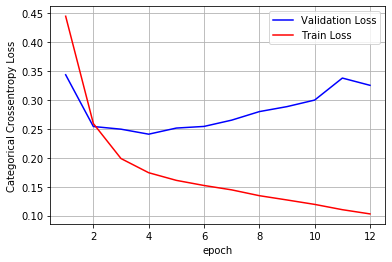

In [48]:
import matplotlib.pyplot as plt
# Plot train and cross validation error
plot_train_cv_loss(model_1, epochs)



## Model 2 : 2 Layer LSTM

In [27]:
# create the model
#https://stackoverflow.com/questions/40331510/how-to-stack-multiple-lstm-in-keras
model_2 = Sequential()

#Embedding layer
model_2.add(Embedding(vocab_size, embedding_vector_length))

model_2.add(BatchNormalization())


model_2.add(Dropout(0.20))

#LSTM layer 1
model_2.add(LSTM(100,bias_regularizer=reg,return_sequences=True))

model_2.add(Dropout(0.20))
# LSTM layer2
model_2.add(LSTM(80, bias_regularizer=reg))

model_2.add(Dense(1, activation='relu'))
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_2.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          1283648   
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 32)          128       
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 100)         53200     
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 80)                57920     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 81        
Total para

In [32]:
model_2 = model_2.fit(x_train, np.array(y_train), batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

Train on 35000 samples, validate on 15000 samples
Epoch 1/12
35000/35000 [==============================] - ETA: 7:34 - loss: 3.6507 - acc: 0.850 - ETA: 7:57 - loss: 3.6080 - acc: 0.852 - ETA: 7:33 - loss: 3.5811 - acc: 0.862 - ETA: 7:33 - loss: 3.5803 - acc: 0.861 - ETA: 7:18 - loss: 3.5701 - acc: 0.857 - ETA: 7:08 - loss: 3.5691 - acc: 0.854 - ETA: 7:08 - loss: 3.5668 - acc: 0.855 - ETA: 6:58 - loss: 3.5664 - acc: 0.856 - ETA: 6:56 - loss: 3.5683 - acc: 0.858 - ETA: 6:47 - loss: 3.5715 - acc: 0.858 - ETA: 6:46 - loss: 3.5765 - acc: 0.858 - ETA: 6:36 - loss: 3.5790 - acc: 0.858 - ETA: 6:28 - loss: 3.5792 - acc: 0.860 - ETA: 6:24 - loss: 3.5773 - acc: 0.862 - ETA: 6:16 - loss: 3.5760 - acc: 0.862 - ETA: 6:11 - loss: 3.5725 - acc: 0.863 - ETA: 6:04 - loss: 3.5681 - acc: 0.864 - ETA: 5:59 - loss: 3.5635 - acc: 0.864 - ETA: 5:51 - loss: 3.5580 - acc: 0.864 - ETA: 5:43 - loss: 3.5533 - acc: 0.864 - ETA: 5:37 - loss: 3.5470 - acc: 0.864 - ETA: 5:29 - loss: 3.5439 - acc: 0.864 - ETA: 5:24 - 

35000/35000 [==============================] - ETA: 8:45 - loss: 2.8238 - acc: 0.918 - ETA: 8:06 - loss: 2.8384 - acc: 0.899 - ETA: 8:13 - loss: 2.8542 - acc: 0.900 - ETA: 7:55 - loss: 2.8524 - acc: 0.896 - ETA: 7:56 - loss: 2.8493 - acc: 0.898 - ETA: 7:42 - loss: 2.8454 - acc: 0.899 - ETA: 7:42 - loss: 2.8604 - acc: 0.896 - ETA: 7:28 - loss: 2.8535 - acc: 0.897 - ETA: 7:18 - loss: 2.8513 - acc: 0.899 - ETA: 7:12 - loss: 2.8458 - acc: 0.899 - ETA: 7:03 - loss: 2.8438 - acc: 0.899 - ETA: 7:03 - loss: 2.8413 - acc: 0.901 - ETA: 6:54 - loss: 2.8372 - acc: 0.900 - ETA: 6:49 - loss: 2.8302 - acc: 0.902 - ETA: 6:40 - loss: 2.8273 - acc: 0.902 - ETA: 6:34 - loss: 2.8240 - acc: 0.903 - ETA: 6:25 - loss: 2.8223 - acc: 0.903 - ETA: 6:20 - loss: 2.8185 - acc: 0.904 - ETA: 6:12 - loss: 2.8168 - acc: 0.904 - ETA: 6:05 - loss: 2.8181 - acc: 0.904 - ETA: 5:56 - loss: 2.8153 - acc: 0.904 - ETA: 5:48 - loss: 2.8153 - acc: 0.905 - ETA: 5:42 - loss: 2.8156 - acc: 0.904 - ETA: 5:34 - loss: 2.8142 - acc: 0

35000/35000 [==============================] - ETA: 9:18 - loss: 2.2621 - acc: 0.932 - ETA: 9:19 - loss: 2.2699 - acc: 0.920 - ETA: 9:16 - loss: 2.2560 - acc: 0.922 - ETA: 8:46 - loss: 2.2676 - acc: 0.915 - ETA: 8:44 - loss: 2.2646 - acc: 0.913 - ETA: 8:34 - loss: 2.2816 - acc: 0.915 - ETA: 8:28 - loss: 2.3108 - acc: 0.911 - ETA: 8:12 - loss: 2.3101 - acc: 0.914 - ETA: 8:06 - loss: 2.3010 - acc: 0.915 - ETA: 7:53 - loss: 2.3056 - acc: 0.915 - ETA: 7:47 - loss: 2.3019 - acc: 0.916 - ETA: 7:35 - loss: 2.3063 - acc: 0.914 - ETA: 7:35 - loss: 2.3228 - acc: 0.905 - ETA: 7:28 - loss: 2.3422 - acc: 0.892 - ETA: 7:21 - loss: 2.3497 - acc: 0.891 - ETA: 7:17 - loss: 2.3561 - acc: 0.892 - ETA: 7:10 - loss: 2.3639 - acc: 0.890 - ETA: 7:03 - loss: 2.3706 - acc: 0.888 - ETA: 6:52 - loss: 2.3776 - acc: 0.885 - ETA: 6:41 - loss: 2.3853 - acc: 0.884 - ETA: 6:34 - loss: 2.3942 - acc: 0.882 - ETA: 6:24 - loss: 2.4008 - acc: 0.881 - ETA: 6:21 - loss: 2.4050 - acc: 0.880 - ETA: 6:12 - loss: 2.4079 - acc: 0

35000/35000 [==============================] - ETA: 9:46 - loss: 1.8278 - acc: 0.912 - ETA: 8:58 - loss: 1.8421 - acc: 0.915 - ETA: 8:59 - loss: 1.8294 - acc: 0.917 - ETA: 8:40 - loss: 1.8402 - acc: 0.912 - ETA: 8:41 - loss: 1.8585 - acc: 0.909 - ETA: 8:26 - loss: 1.8685 - acc: 0.909 - ETA: 8:22 - loss: 1.8570 - acc: 0.910 - ETA: 8:20 - loss: 1.8561 - acc: 0.909 - ETA: 8:14 - loss: 1.8541 - acc: 0.908 - ETA: 8:02 - loss: 1.8591 - acc: 0.907 - ETA: 7:55 - loss: 1.8605 - acc: 0.906 - ETA: 7:44 - loss: 1.8601 - acc: 0.905 - ETA: 7:38 - loss: 1.8572 - acc: 0.906 - ETA: 7:28 - loss: 1.8534 - acc: 0.905 - ETA: 7:22 - loss: 1.8519 - acc: 0.906 - ETA: 7:12 - loss: 1.8470 - acc: 0.906 - ETA: 7:09 - loss: 1.8418 - acc: 0.907 - ETA: 7:06 - loss: 1.8410 - acc: 0.907 - ETA: 6:56 - loss: 1.8388 - acc: 0.907 - ETA: 6:49 - loss: 1.8406 - acc: 0.908 - ETA: 6:39 - loss: 1.8375 - acc: 0.909 - ETA: 6:31 - loss: 1.8384 - acc: 0.908 - ETA: 6:21 - loss: 1.8354 - acc: 0.907 - ETA: 6:14 - loss: 1.8395 - acc: 0

35000/35000 [==============================] - ETA: 10:13 - loss: 1.9131 - acc: 0.86 - ETA: 9:23 - loss: 1.9874 - acc: 0.8560 - ETA: 9:25 - loss: 1.8952 - acc: 0.862 - ETA: 9:03 - loss: 1.8237 - acc: 0.867 - ETA: 9:06 - loss: 1.7875 - acc: 0.862 - ETA: 8:51 - loss: 1.7607 - acc: 0.860 - ETA: 8:54 - loss: 1.7359 - acc: 0.861 - ETA: 8:40 - loss: 1.7169 - acc: 0.863 - ETA: 8:35 - loss: 1.7081 - acc: 0.862 - ETA: 8:23 - loss: 1.7030 - acc: 0.860 - ETA: 8:16 - loss: 1.6956 - acc: 0.862 - ETA: 8:05 - loss: 1.6926 - acc: 0.861 - ETA: 7:59 - loss: 1.6891 - acc: 0.860 - ETA: 7:49 - loss: 1.6852 - acc: 0.860 - ETA: 7:46 - loss: 1.6830 - acc: 0.859 - ETA: 7:38 - loss: 1.6806 - acc: 0.858 - ETA: 7:28 - loss: 1.6773 - acc: 0.857 - ETA: 7:21 - loss: 1.6738 - acc: 0.856 - ETA: 7:10 - loss: 1.6697 - acc: 0.856 - ETA: 7:04 - loss: 1.6657 - acc: 0.856 - ETA: 6:54 - loss: 1.6610 - acc: 0.856 - ETA: 6:52 - loss: 1.6568 - acc: 0.856 - ETA: 6:42 - loss: 1.6520 - acc: 0.856 - ETA: 6:35 - loss: 1.6477 - acc: 

35000/35000 [==============================] - ETA: 10:13 - loss: 1.1284 - acc: 0.91 - ETA: 10:01 - loss: 1.1220 - acc: 0.91 - ETA: 9:59 - loss: 1.1313 - acc: 0.9047 - ETA: 10:02 - loss: 1.1127 - acc: 0.91 - ETA: 9:40 - loss: 1.1296 - acc: 0.9144 - ETA: 9:29 - loss: 1.1238 - acc: 0.920 - ETA: 9:22 - loss: 1.1194 - acc: 0.920 - ETA: 9:13 - loss: 1.1157 - acc: 0.921 - ETA: 9:00 - loss: 1.1178 - acc: 0.920 - ETA: 8:54 - loss: 1.1179 - acc: 0.921 - ETA: 8:39 - loss: 1.1142 - acc: 0.921 - ETA: 8:32 - loss: 1.1162 - acc: 0.920 - ETA: 8:21 - loss: 1.1135 - acc: 0.918 - ETA: 8:13 - loss: 1.1145 - acc: 0.917 - ETA: 8:05 - loss: 1.1112 - acc: 0.915 - ETA: 7:57 - loss: 1.1127 - acc: 0.913 - ETA: 7:49 - loss: 1.1121 - acc: 0.912 - ETA: 7:37 - loss: 1.1110 - acc: 0.911 - ETA: 7:31 - loss: 1.1104 - acc: 0.910 - ETA: 7:20 - loss: 1.1091 - acc: 0.909 - ETA: 7:14 - loss: 1.1064 - acc: 0.910 - ETA: 7:04 - loss: 1.1050 - acc: 0.909 - ETA: 6:56 - loss: 1.1021 - acc: 0.907 - ETA: 6:48 - loss: 1.1011 - acc:

In [38]:
import matplotlib.pyplot as plt

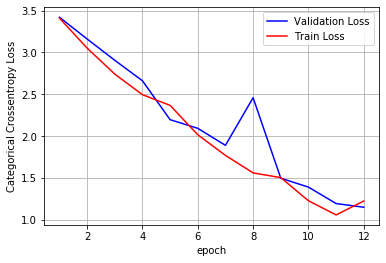

In [39]:

# Plot train and cross validation error
plot_train_cv_loss(model_2, epochs)

In [40]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model No.","Architecture","Epochs","Dropout rate","Activation function","Optimizer","Test Loss","Test Accuracy"]

x.add_row(["Model 1","1_Layer LSTM","12", "0.2","Sigmoid","Adam",0.3256,0.8846])

x.add_row(["Model 2","2 Layer LSTM","12", "0.2","Relu","Adam",1.141,0.8437])


print(x)

+-----------+--------------+--------+--------------+---------------------+-----------+-----------+---------------+
| Model No. | Architecture | Epochs | Dropout rate | Activation function | Optimizer | Test Loss | Test Accuracy |
+-----------+--------------+--------+--------------+---------------------+-----------+-----------+---------------+
|  Model 1  | 1_Layer LSTM |   12   |     0.2      |       Sigmoid       |    Adam   |   0.3256  |     0.8846    |
|  Model 2  | 2 Layer LSTM |   12   |     0.2      |         Relu        |    Adam   |   1.141   |     0.8437    |
+-----------+--------------+--------+--------------+---------------------+-----------+-----------+---------------+
